# Exploratory Data Analysis - Spotify Song Attributes

---

### Importing Libraries



In [37]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

from sklearn import tree
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split # Allows to split out training data from test data
from sklearn.tree import export_graphviz

import graphviz
import pydotplus
import io

### Loading the Data

In [22]:
data = pd.read_csv('data.csv')

In [23]:
data.head()

,Unnamed: 0,acousticness,danceability,duration_ms,energy,instrumentalness,key,liveness,loudness,mode,speechiness,tempo,time_signature,valence,target,song_title,artist
0,0,0.0102,0.833,204600,0.434,0.021900,2,0.1650,-8.795,1,0.4310,150.062,4.0,0.286,1,Mask Off,Future
1,1,0.1990,0.743,326933,0.359,0.006110,1,0.1370,-10.401,1,0.0794,160.083,4.0,0.588,1,Redbone,Childish Gambino
2,2,0.0344,0.838,185707,0.412,0.000234,2,0.1590,-7.148,1,0.2890,75.044,4.0,0.173,1,Xanny Family,Future
3,3,0.6040,0.494,199413,0.338,0.510000,5,0.0922,-15.236,1,0.0261,86.468,4.0,0.230,1,Master Of None,Beach House
4,4,0.1800,0.678,392893,0.561,0.512000,5,0.4390,-11.648,0,0.0694,174.004,4.0,0.904,1,Parallel Lines,Junior Boys


In [24]:
data.describe()

,Unnamed: 0,acousticness,danceability,duration_ms,energy,instrumentalness,key,liveness,loudness,mode,speechiness,tempo,time_signature,valence,target
count,2017.000000,2017.000000,2017.000000,2.017000e+03,2017.000000,2017.000000,2017.000000,2017.000000,2017.000000,2017.000000,2017.000000,2017.000000,2017.000000,2017.000000,2017.000000
mean,1008.000000,0.187590,0.618422,2.463062e+05,0.681577,0.133286,5.342588,0.190844,-7.085624,0.612295,0.092664,121.603272,3.968270,0.496815,0.505702
std,582.402066,0.259989,0.161029,8.198181e+04,0.210273,0.273162,3.648240,0.155453,3.761684,0.487347,0.089931,26.685604,0.255853,0.247195,0.500091
min,0.000000,0.000003,0.122000,1.604200e+04,0.014800,0.000000,0.000000,0.018800,-33.097000,0.000000,0.023100,47.859000,1.000000,0.034800,0.000000
25%,504.000000,0.009630,0.514000,2.000150e+05,0.563000,0.000000,2.000000,0.092300,-8.394000,0.000000,0.037500,100.189000,4.000000,0.295000,0.000000
50%,1008.000000,0.063300,0.631000,2.292610e+05,0.715000,0.000076,6.000000,0.127000,-6.248000,1.000000,0.054900,121.427000,4.000000,0.492000,1.000000
75%,1512.000000,0.265000,0.738000,2.703330e+05,0.846000,0.054000,9.000000,0.247000,-4.746000,1.000000,0.108000,137.849000,4.000000,0.691000,1.000000
max,2016.000000,0.995000,0.984000,1.004627e+06,0.998000,0.976000,11.000000,0.969000,-0.307000,1.000000,0.816000,219.331000,5.000000,0.992000,1.000000


#### Check for null values

In [25]:
data.isnull().sum()

Unnamed: 0          0
acousticness        0
danceability        0
duration_ms         0
energy              0
instrumentalness    0
key                 0
liveness            0
loudness            0
mode                0
speechiness         0
tempo               0
time_signature      0
valence             0
target              0
song_title          0
artist              0
dtype: int64

### Creating the train & test dataset

In [26]:
train, test = train_test_split(data, test_size = 0.15)

In [27]:
print ("Training Size:{}; Test Size:{}".format(len(train), len(test)))

Training Size:1714; Test Size:303


### Visualization

In [28]:
pos_tempo = data[data['target'] == 1]['tempo'] #creating a variable for tempo of song's user liked
neg_tempo = data[data['target'] == 0]['tempo'] #creating a variable for tempo of song's user disliked
pos_dance = data[data['target'] == 1]['danceability'] 
neg_dance = data[data['target'] == 0]['danceability']
pos_duration = data[data['target'] == 1]['duration_ms'] 
neg_duration = data[data['target'] == 0]['duration_ms']
pos_loudness = data[data['target'] == 1]['loudness'] 
neg_loudness = data[data['target'] == 0]['loudness']
pos_speechiness = data[data['target'] == 1]['speechiness'] 
neg_speechiness = data[data['target'] == 0]['speechiness']
pos_valence = data[data['target'] == 1]['valence'] 
neg_valence = data[data['target'] == 0]['valence']
pos_energy = data[data['target'] == 1]['energy'] 
neg_energy = data[data['target'] == 0]['energy']
pos_acousticness = data[data['target'] == 1]['acousticness'] 
neg_acousticness = data[data['target'] == 0]['acousticness']
pos_key = data[data['target'] == 1]['key'] 
neg_key = data[data['target'] == 0]['key']
pos_instrumentalness = data[data['target'] == 1]['instrumentalness'] 
neg_instrumentalness = data[data['target'] == 0]['instrumentalness']

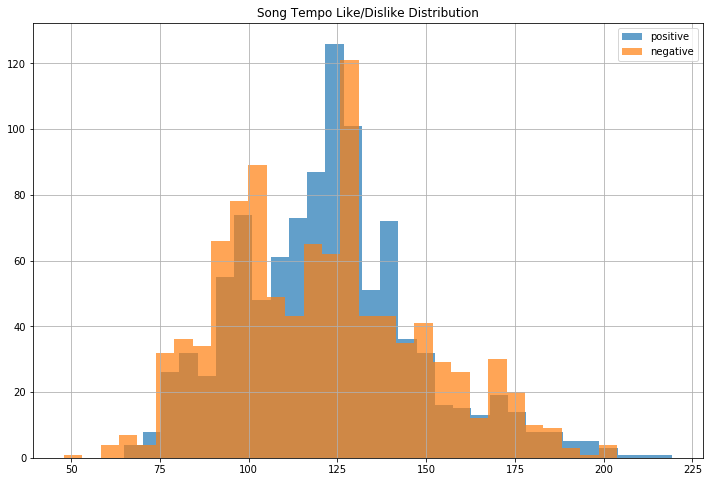

In [29]:
fig = plt.figure(figsize = (12,8))
plt.title("Song Tempo Like/Dislike Distribution")
pos_tempo.hist(alpha = 0.7, bins = 30, label = 'positive')
neg_tempo.hist(alpha = 0.7, bins = 30, label = 'negative')
plt.legend(loc = 'upper right')

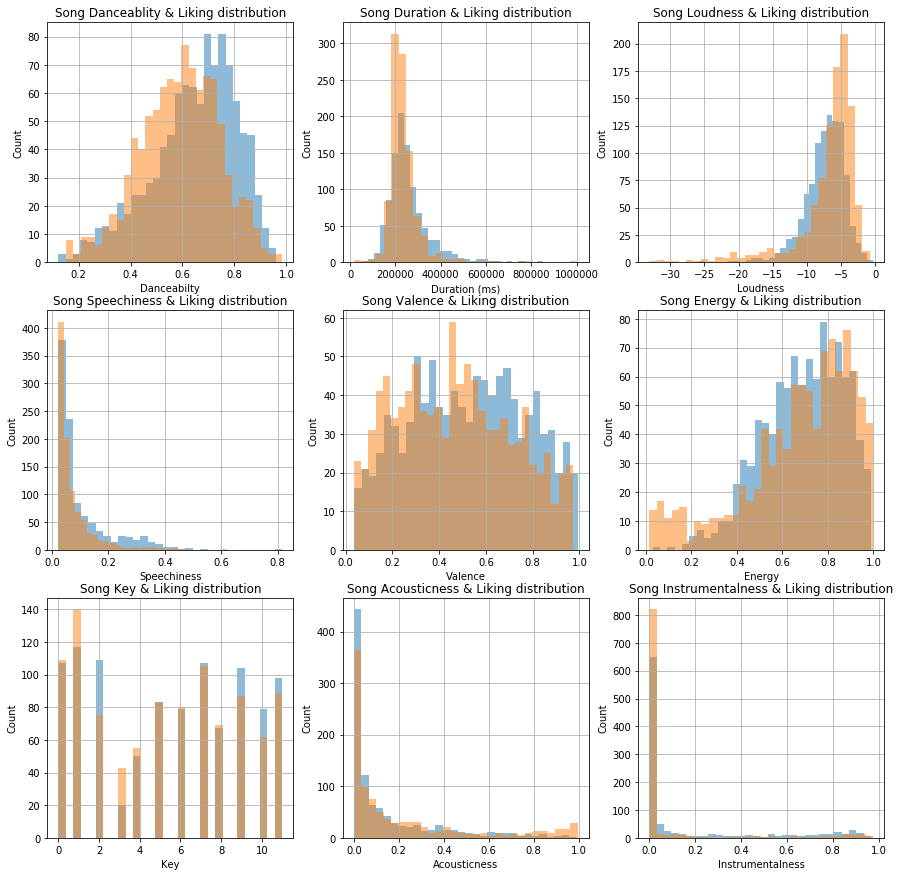

In [30]:
fig2 = plt.figure(figsize = (15,15))

#Dancebility
ax3 = fig2.add_subplot(331)
ax3.set_xlabel('Danceabilty')
ax3.set_ylabel('Count')
ax3.set_title('Song Danceablity & Liking distribution')
pos_dance.hist(alpha = 0.5, bins = 30)

ax4 = fig2.add_subplot(331)
neg_dance.hist(alpha = 0.5, bins = 30)

#Duration
ax5 = fig2.add_subplot(332)
ax5.set_xlabel('Duration (ms)')
ax5.set_ylabel('Count')
ax5.set_title('Song Duration & Liking distribution')
pos_duration.hist(alpha = 0.5, bins = 30)

ax6 = fig2.add_subplot(332)
neg_duration.hist(alpha = 0.5, bins = 30)

#Loudness
ax7 = fig2.add_subplot(333)
ax7.set_xlabel('Loudness')
ax7.set_ylabel('Count')
ax7.set_title('Song Loudness & Liking distribution')
pos_loudness.hist(alpha = 0.5, bins = 30)

ax8 = fig2.add_subplot(333)
neg_loudness.hist(alpha = 0.5, bins = 30)

#Speechiness
ax9 = fig2.add_subplot(334)
ax9.set_xlabel('Speechiness')
ax9.set_ylabel('Count')
ax9.set_title('Song Speechiness & Liking distribution')
pos_speechiness.hist(alpha = 0.5, bins = 30)

ax10 = fig2.add_subplot(334)
neg_speechiness.hist(alpha = 0.5, bins = 30)

#Valence
ax11 = fig2.add_subplot(335)
ax11.set_xlabel('Valence')
ax11.set_ylabel('Count')
ax11.set_title('Song Valence & Liking distribution')
pos_valence.hist(alpha = 0.5, bins = 30)

ax12 = fig2.add_subplot(335)
neg_valence.hist(alpha = 0.5, bins = 30)

#Energy
ax13 = fig2.add_subplot(336)
ax13.set_xlabel('Energy')
ax13.set_ylabel('Count')
ax13.set_title('Song Energy & Liking distribution')
pos_energy.hist(alpha = 0.5, bins = 30)

ax14 = fig2.add_subplot(336)
neg_energy.hist(alpha = 0.5, bins = 30)

#Key
ax15 = fig2.add_subplot(337)
ax15.set_xlabel('Key')
ax15.set_ylabel('Count')
ax15.set_title('Song Key & Liking distribution')
pos_key.hist(alpha = 0.5, bins = 30)

ax16 = fig2.add_subplot(337)
neg_key.hist(alpha = 0.5, bins = 30)

#Acousticness
ax17 = fig2.add_subplot(338)
ax17.set_xlabel('Acousticness')
ax17.set_ylabel('Count')
ax17.set_title('Song Acousticness & Liking distribution')
pos_acousticness.hist(alpha = 0.5, bins = 30)

ax18 = fig2.add_subplot(338)
neg_acousticness.hist(alpha = 0.5, bins = 30)

#Instrumentalness
ax19 = fig2.add_subplot(339)
ax19.set_xlabel('Instrumentalness')
ax19.set_ylabel('Count')
ax19.set_title('Song Instrumentalness & Liking distribution')
pos_instrumentalness.hist(alpha = 0.5, bins = 30)

ax20 = fig2.add_subplot(339)
neg_instrumentalness.hist(alpha = 0.5, bins = 30)

### Decision Tree Classifiers

In [31]:
c = DecisionTreeClassifier(min_samples_split = 100)

In [32]:
features = ["danceability","loudness","valence","energy","instrumentalness","acousticness","key","speechiness","duration_ms"]

#### Defining Training Set

In [33]:
X_train = train[features]
y_train = train["target"]

X_test = test[features]
y_test = test["target"]

#### Building Decision Tree

In [34]:
dt = c.fit(X_train, y_train)

### Method to produce Decision Tree Image

In [39]:
def show_tree(tree, features, path):
    f = io.StringIO()
    export_graphviz(tree, out_file = f, feature_names = features)
    pydotplus.graph_from_dot_data(f.getvalue()).write_png(path)
    img = plt.imread(path)
    plt.rcParams["figure.figsize"] = (20,20)
    plt.imshow(img)

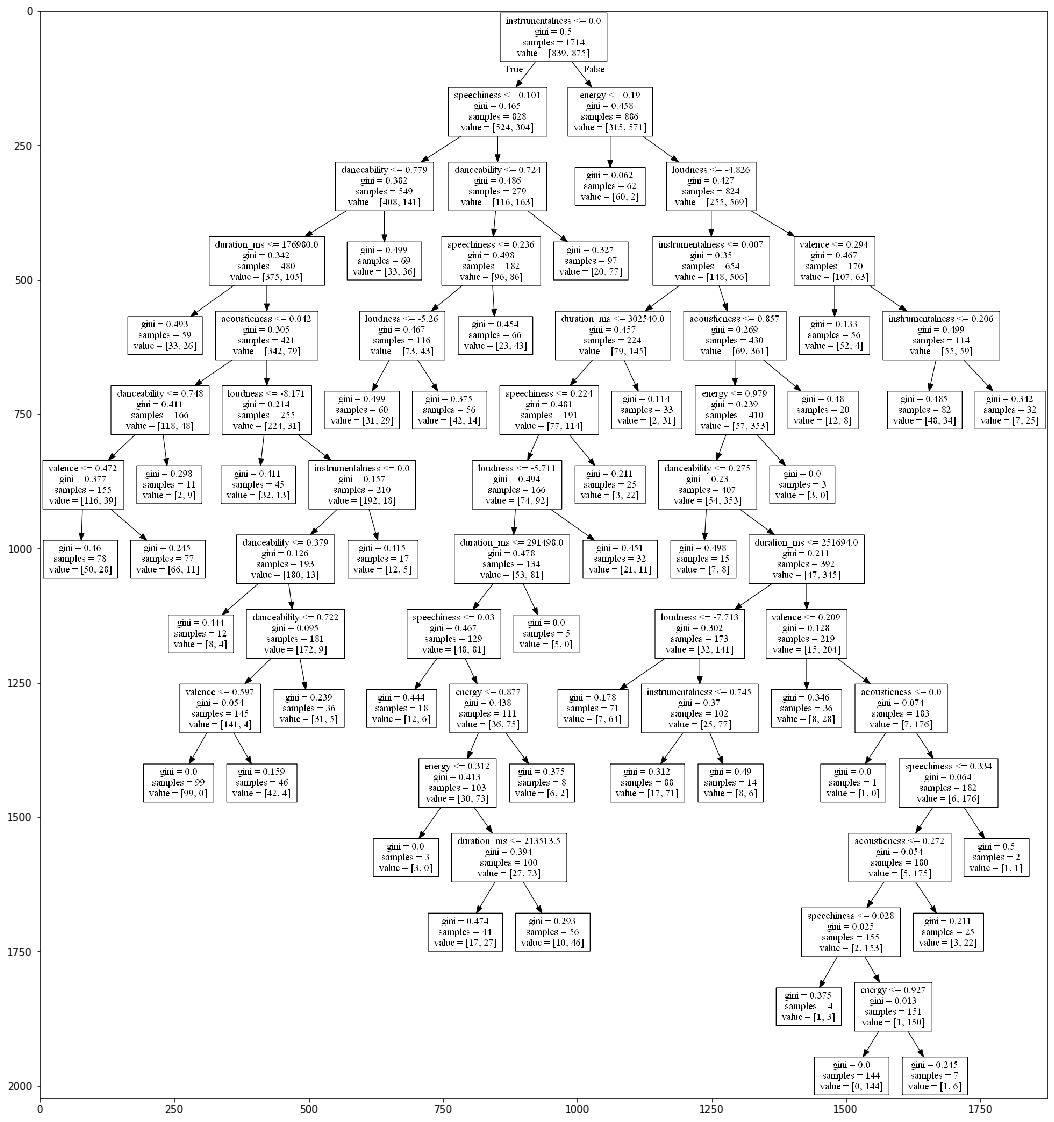

In [40]:
show_tree(dt,features, 'dec_tree_01.png')

In [41]:
y_pred = c.predict(X_test)

In [42]:
y_pred

array([0, 1, 1, 0, 1, 1, 0, 1, 0, 0, 1, 0, 1, 0, 1, 0, 1, 0, 0, 1, 1, 1,
       0, 0, 1, 0, 0, 1, 0, 1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 0, 0, 1,
       1, 0, 0, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 0, 0, 1, 0, 0, 1, 0,
       1, 0, 0, 1, 1, 0, 1, 0, 1, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0,
       0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 1, 1, 0, 1, 0,
       0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 1, 0, 1, 0, 1,
       1, 1, 0, 1, 1, 0, 0, 0, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 0, 0, 1, 1,
       0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 1, 0, 1, 1, 1,
       1, 0, 0, 0, 1, 1, 1, 0, 1, 0, 1, 0, 1, 0, 1, 1, 0, 1, 0, 0, 1, 0,
       1, 1, 0, 1, 0, 1, 0, 0, 1, 0, 1, 1, 1, 0, 0, 0, 1, 0, 1, 0, 0, 0,
       0, 1, 1, 1, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0,
       0, 0, 1, 0, 1, 1, 0, 1, 0, 0, 1, 1, 0, 1, 1, 0, 0, 0, 1, 1, 0, 0,
       1, 1, 0, 0, 1, 1, 1, 1, 0, 0, 0, 0, 0, 1, 1, 0, 1, 1, 0, 0, 1, 0,
       0, 0, 1, 1, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0,

In [44]:
from sklearn.metrics import accuracy_score

score = accuracy_score(y_test,y_pred) * 100

In [45]:
print ("Accuracy using Decision Tree: ", round (score,1), "%")

Accuracy using Decision Tree:  72.3 %
